In [2]:
import pyarrow.parquet as pq
import pyarrow.compute as pc
import datetime as dt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./data/train_events.csv')

In [4]:
df.head()

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400


In [5]:
data = pq.read_table('./data/train_series.parquet')

In [6]:
df = data.filter(pc.field('series_id') == '038441c925bb').to_pandas()
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%S%z')

df.dtypes

series_id                       object
step                            uint32
timestamp    datetime64[ns, UTC-04:00]
anglez                         float32
enmo                           float32
dtype: object

<Axes: xlabel='timestamp'>

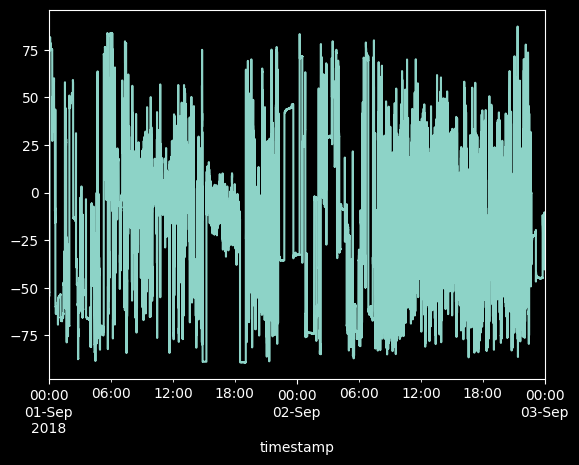

In [7]:
df[df['timestamp'].between('2018-09-01', '2018-09-03')].set_index('timestamp')['anglez'].plot()

<Axes: xlabel='timestamp'>

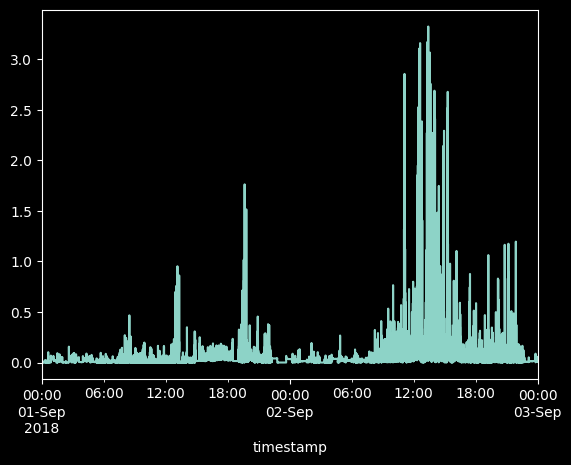

In [8]:
df[df['timestamp'].between('2018-09-01', '2018-09-03')].set_index('timestamp')['enmo'].plot()